In [132]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [133]:
class GD:
    
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
            
    def func(self, x):
        return (self.a * x * x + self.b * x + self.c)
        
    
    def func_derivative(self, x):
        return (self.a * 2 * x + self.b)
        

    def gradient_descent(self, step_size = 0.1, epsilon = 0.0001):
        previous_x = 0
        current_x = previous_x - step_size * self.func_derivative(previous_x)
        i=1
        
        while abs(self.func(current_x) - self.func(previous_x)) >= epsilon:
            x_plot = [previous_x, current_x]
            y_plot = [self.func(previous_x), self.func(current_x)]
            
            previous_x = current_x
            current_x = previous_x - step_size * self.func_derivative(previous_x)
            i=i+1

            plt.plot(x_plot, y_plot, marker = 'o')
            
            if x_plot[1] > x_plot[0]:
                plt.plot((x_plot[1] + x_plot[0]) / 2, (y_plot[1] + y_plot[0]) / 2 , 'k>')
            
            elif x_plot[0] > x_plot[1]:
                plt.plot((x_plot[1] + x_plot[0]) / 2, (y_plot[1] + y_plot[0]) / 2 , 'k<')
           
            if i == 100:
                break
        
        x = range(0, int(current_x) + 3)
        y = list(map(f.func, x))
        plt.plot(x, y);
              
        return print("After", i, "steps x=", format(current_x, ".6f"), 
                     " function value=", format(self.func(current_x), ".6f"))

    

After 27 steps x= 4.987911  function value= 0.000146


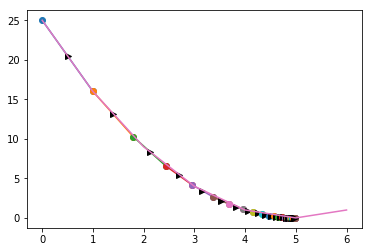

In [134]:
f = GD(1,-10,25)
f.gradient_descent(step_size = 0.1)

After 27 steps x= 5.012089  function value= 0.000146


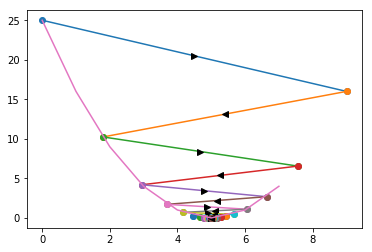

In [135]:
f.gradient_descent(step_size = 0.9)

After 100 steps x= -2050093044424951.000000  function value= 4202881490799584626882333638656.000000


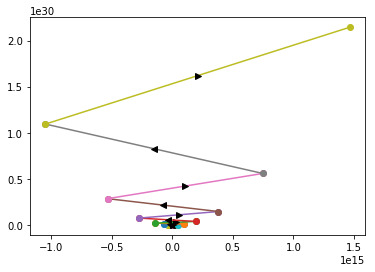

In [136]:
f.gradient_descent(step_size = 1.2)

Gradient descent for paraboloid

In [137]:
class GD3:
    
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
            
    def func(self, x, y):
        #print(x)
        return (self.a * x * x + self.b * y * y + self.c)
        
    
    def func_derivative_x(self, x):
        return (self.a * 2 * x)
    
    
    def func_derivative_y(self, y):
        return (self.b * 2 * y)
        

    def gradient_descent(self, step_size = 0.1, epsilon = 0.0001):
        previous_x = 1
        previous_y = 1
        
        current_x = previous_x - step_size * self.func_derivative_x(previous_x)
        current_y = previous_y - step_size * self.func_derivative_y(previous_y)
        
        i=1
        
        while abs(self.func(current_x, current_y) - self.func(previous_x, previous_y)) >= epsilon:
            
            previous_x = current_x
            previous_y = current_y
            
            current_x = previous_x - step_size * self.func_derivative_x(previous_x)
            current_y = previous_y - step_size * self.func_derivative_y(previous_y)
            
            i=i+1
            
            if i == 100:
                break
              
        return print("After", i, "steps x=", format(current_x, ".6f"), "  y=", format(current_y, ".6f"), 
                     " function value=", format(self.func(current_x, current_y), ".6f"))

    

In [151]:
f3 = GD3(4,16,0)
f3.gradient_descent(step_size = 0.01)

After 54 steps x= 0.011080   y= 0.000000  function value= 0.000491


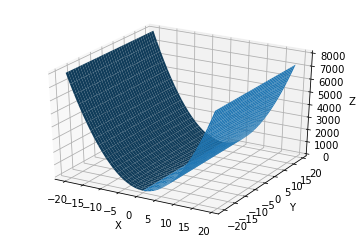

In [150]:
# draw paraboloid
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')

x = y = np.arange(-20.0, 20.0)
X, Y = np.meshgrid(x, y) 
z = np.array(list(map(f3.func, x,y)))

ax.plot_surface(X, Y, z)

    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
